In [8]:
import os
import numpy as np
from matplotlib import pyplot as mp
import cv2 as cv
from scipy.constants import h, c, k
from scipy import integrate
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [9]:
def BGR2xyz(im):
    A = np.array([[0.49000, 0.31000, 0.20000],
                  [0.17697, 0.81240, 0.01063],
                  [0.00000, 0.01000, 0.99000]], 'float32')
    b, g, r = cv.split(im)
    x = np.array([r, g, b])
    return A @ x

def spec2xyz(spectrum, fbar):
    XYZ = []
    for i in range(len(fbar)):
        integrand = spectrum*fbar[i]
        if type(spectrum) not in [list, np.ndarray]:
            integral = integrand
        else:
            integral = integrate.trapz(integrand, spectrum)
        XYZ.append(integral)
    I = np.sum(XYZ)
    x = XYZ[0]/I
    y = XYZ[1]/I
    z = XYZ[2]/I
    return x, y, z

def B(l, T):
    return (2*h*c*c)/(l**5 * (np.exp((h*c)/(l*k*T)) - 1))

In [4]:
wavelength, xbar, ybar, zbar = np.genfromtxt('cie1964.csv', delimiter=',', unpack=True)

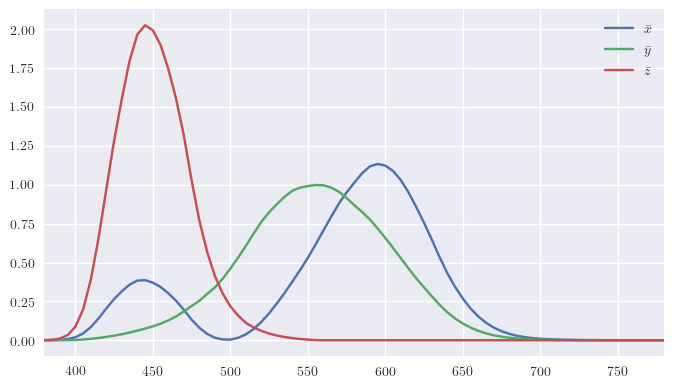

In [5]:
mp.plot(wavelength, xbar,
        wavelength, ybar,
        wavelength, zbar)
mp.legend([r'$\bar{x}$', r'$\bar{y}$', r'$\bar{z}$'])
mp.xlim(wavelength.min(), wavelength.max())
mp.show()

In [75]:
boundx, boundy = [], []
for i in range(len(wavelength)):
    if i%2 != 0:
        continue
    x, y, _ = spec2xyz(wavelength[i], [xbar[i], ybar[i], zbar[i]])
    boundx.append(x)
    boundy.append(y)
    
locusx, locusy = [], []
T = np.arange(1000, 10001, 1000)
for t in T:
    bl = B(wavelength*1e-9, t)
    ba = integrate.trapz(bl, wavelength*1e-9)
    b = bl/ba
    x, y, _ = spec2xyz(bl, [xbar, ybar, zbar])
    locusx.append(x)
    locusy.append(y)

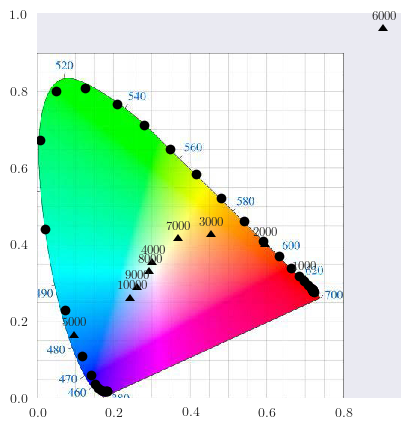

In [76]:
ciexy = mp.imread('ciexy.jpg')
mp.figure(figsize=(5, 5))
mp.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
mp.plot(boundx, boundy, 'ko')
mp.plot(locusx, locusy, color='k', ls='None', marker=10)
for i, s in enumerate(T):
    mp.text(locusx[i]-0.03, locusy[i]+0.03, str(s), fontsize=9)
# for i in range(len(boundx)):
#     mp.text(boundx[i]-0.03, boundy[i]+0.03, str(int(wavelength[::2][i])), fontsize=9)
mp.grid(0)
mp.show()